In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib as plt


In [5]:
# ایجاد مجموعه داده
np.random.seed(0)
x = np.random.rand(200)
y = 2*x**4 + 3*x**3 - 4*x**2 + 5*x - 6  # معادله درجه 4

# ایجاد یک DataFrame از Pandas
df = pd.DataFrame({'X': x, 'Y': y})

print(df.head())


          X         Y
0  0.548814 -3.783377
1  0.715189 -2.849331
2  0.602763 -3.518475
3  0.544883 -3.801555
4  0.423655 -4.307114


In [6]:
from sklearn.model_selection import train_test_split

# ایجاد داده های ورودی و خروجی
X = df[['X']]
y = df['Y']

# تقسیم داده به دو بخش train و test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# نمایش ابعاد داده های آموزش و تست
print("ابعاد داده‌های آموزش:", X_train.shape, y_train.shape)
print("ابعاد داده‌های تست:", X_test.shape, y_test.shape)


ابعاد داده‌های آموزش: (160, 1) (160,)
ابعاد داده‌های تست: (40, 1) (40,)


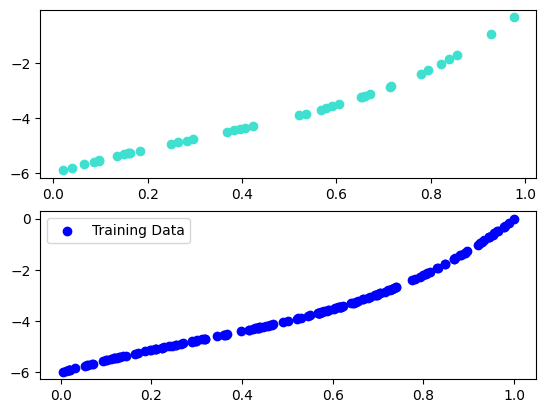

In [20]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
# رسم داده‌های فیروزه‌ای برای داده‌های تست
plt.scatter(X_test, y_test, color='turquoise', label='Test Data')

plt.subplot(2,1,2)
# رسم داده‌های آبی برای داده‌های آموزش
plt.scatter(X_train, y_train, color='blue', label='Training Data')

plt.legend()
plt.show()


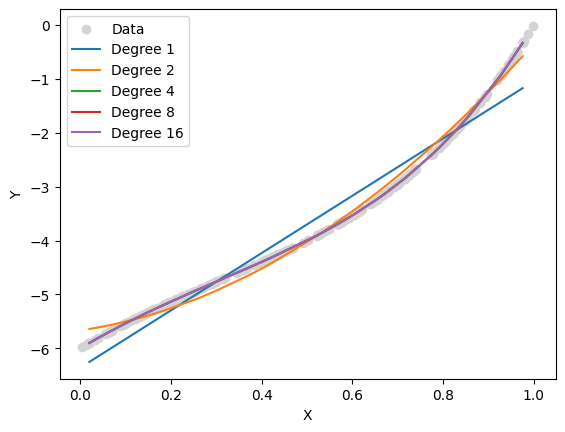

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Fit polynomial regression models of different degrees
degrees = [1, 2, 4, 8, 16]
plt.scatter(df['X'], df['Y'], color='lightgray', label='Data', zorder=2)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(np.sort(X_test.values, axis=0), np.sort(y_pred, axis=0), label=f'Degree {degree}', zorder=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Yalda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, 

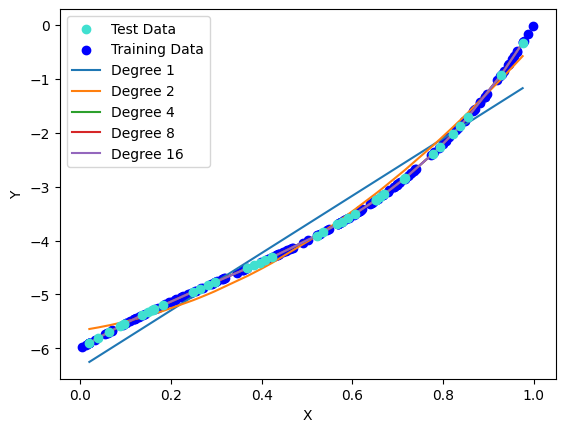

In [13]:

# Fit polynomial regression models of different degrees and plot the results
degrees = [1, 2, 4, 8, 16]
plt.scatter(X_test, y_test, color='turquoise', label='Test Data', zorder=3)
plt.scatter(X_train, y_train, color='blue', label='Training Data', zorder=2)

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(np.sort(X_test, axis=0))
    plt.plot(np.sort(X_test, axis=0), np.sort(y_pred, axis=0), label=f'Degree {degree}', zorder=2)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


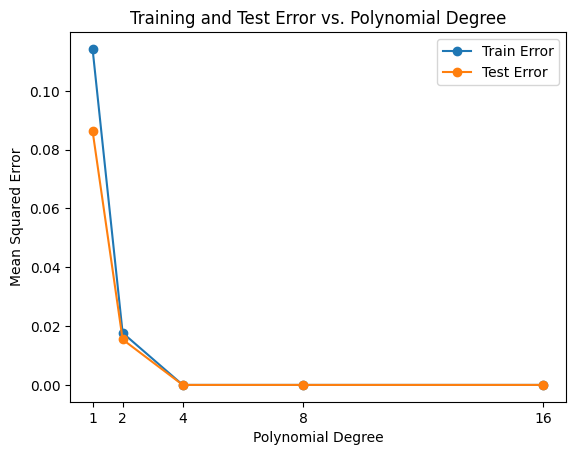

In [22]:
from sklearn.metrics import mean_squared_error

degrees = [1, 2, 4, 8, 16]

train_errors = []
test_errors = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = model.predict(X_test)
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure()
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Polynomial Degree')
plt.xticks(degrees)
plt.legend()
plt.show()


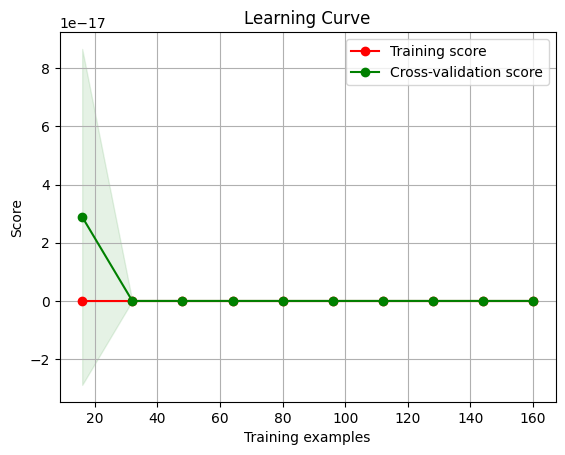

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="neg_mean_squared_error", cv=5
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()


<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='red'> 
پاسخ به سوالات:
</font></p>

<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='#2B547E'> 
در مدل سازی چند جمله ای، overfitting به موقعیتی اشاره دارد که مدل بیش از حد با داده‌های آموزش منطبق شده و به داده‌های تست عملکرد مناسبی نداشته باشد، در حالی که underfitting زمانی رخ می‌دهد که مدل توانایی یادگیری الگوهای موجود در داده‌ها را نداشته و به طور کلی عملکرد ضعیفی داشته باشد. 

</font></p>

<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='#2B547E'> 
با توجه به نمودار "Training and Test Error vs. Polynomial Degree"
اگر خطاهای آموزش و آزمون بر حسب درجه چند جمله‌ای رسم شود، اگر دو خطا به صورت متقارن و به یکدیگر نزدیک باشند 
در انتهای محور x تقارن داشته باشند، این نشان‌دهنده یک مدل مناسب است. اگر خطای آموزش به صورت مداوم کاهش یابد ولی خطای آزمون به مرور افزایش یابد، این نشان‌دهنده overfitting است. همچنین اگر هر دو خطا به مرور افزایش یابند و به هم نزدیک شوند، این نشان‌دهنده underfitting است.
</font></p>

<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='#2B547E'> 
با توجه به نمودار learning curve
اگر منحنی آموزش بسیار خوب عمل کرده ولی منحنی اعتبارسنجی بسیار بد باشد، این نشان دهنده overfitting مدل است. این به معنی این است که مدل شما بر روی داده‌های آموزش خیلی خوب عمل می‌کند اما بر روی داده‌های جدید بد عمل می‌کند.

</font></p>

<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='#2B547E'> 
اگر هر دو منحنی به حداکثر خود برسند و امتیازها به هم نزدیک باشند اما با امتیاز پایین، به این معنی است که مدل شما 
underfitting رخ داده است. این به معنی این است که مدل شما نه بر 
روی داده‌های آموزش خوب عمل کرده و نه بر روی داده‌های جدید.
بهترین مدل، آن است که امتیازها هر دو به بالاترین مقدار ممکن برسند و
فاصله بین امتیازهای آموزش و اعتبارسنجی کم باشد، بهترین مدل، 
بهترین بالانس بین دقت و عملکرد روی داده‌های آموزش و داده‌های جدید را دارد.
</font></p>

<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='red'> 
نتیجه :
</font></p>

<p dir=rtl style="direction: rtl; text-align: right">
<font size=4 color='#2B547E'> 
می توان دریافت که underfitting رخ داده است
و جمع اوری دادگان بیشتر به ما کمک میکند تا مدل بهتری ارائه دهیم.
</font></p>